In [1]:
from random import *
from itertools import combinations


def minConflicts(constraints, maxIter, numWizards):
    currentState = [[False for x in range(numWizards)] for y in range(numWizards)] #matrix of current booleans
    for r in range(numWizards):
        for c in range(r):
            currentState[r][c]=True #possibly might change this to linearized index
    prevConflicts = 0
    for i in range(maxIter):
        conflicts = numberConflicting(currentState, constraints)
        if conflicts == 0:
            print("SATISFIED", i)
            return currentState, i
        maxResolve = 0
        maxRow = -1
        maxCol = -1
        if conflicts - prevConflicts == 0:
#             print(conflicts)
#             print("kick")
            currentState = kick(currentState)
        else:
            for r in range(numWizards):
                for c in range(r):
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
                    newConflicts = numberConflicting(currentState, constraints)
                    if conflicts - newConflicts > maxResolve:
                        maxResolve = conflicts - newConflicts
                        maxRow = r
                        maxCol = c
                    currentState[r][c]= not currentState[r][c]
                    currentState[c][r]= not currentState[c][r]
            
            currentState[maxRow][maxCol] = not currentState[maxRow][maxCol]
            currentState[maxCol][maxRow] = not currentState[maxCol][maxRow]
        prevConflicts = conflicts
    print("GIVEN UP after", maxIter, "iterations")
    return currentState, maxIter

def kick(currentState):
    num_wizards = len(currentState)
    for i in range(num_wizards//7):
        r = int(random()*num_wizards)
        c = int(random()*num_wizards)
        currentState[r][c] = not currentState[r][c]
        currentState[c][r] = not currentState[c][r]
    return currentState

def numberConflicting(currentState, constraints):
    conflicts = 0
    for c in constraints:
        if isConflicting(currentState, c):
            conflicts += 1
    return conflicts
        
def isConflicting(currentState, c):
    return not ((currentState[c[2]][c[0]] and currentState[c[2]][c[1]]) 
            or (currentState[c[0]][c[2]] and currentState[c[1]][c[2]]) )

def prettyPrint(a):
    for r in range (len(a)):
            print(a[r])

import matplotlib.pyplot as plt

from random import shuffle, sample
from itertools import combinations

def make_ordering(n):
    """Generates a random ordering of n wizards, returned as a
    shuffled list containing the elements 0, 1, ..., n-1"""
    order = list(range(n))
    shuffle(order)
    return order

def make_constraints(order, num_constraints=500):
    """Randomly generates constraints on the wizards' ordering,
    where a constraint [a b c] means c is not between a and b."""
    combos = []
    
    for i in range(len(order)):
        for j in range(i + 1, len(order)):
            for k in range(0, i):
                combos.append((order[i], order[j], order[k]))
            for k in range(j + 1, len(order)):
                combos.append((order[i], order[j], order[k]))
    return sample(combos, num_constraints)

In [2]:
n = 10
order = make_ordering(n)
constraints = make_constraints(order, 100)
a, i = minConflicts(constraints, 10000, n)
print(a, i)


SATISFIED 107
[[False, False, True, True, True, True, False, False, True, False], [True, False, True, True, True, True, False, False, True, False], [False, False, False, True, True, True, False, False, True, False], [False, False, False, False, False, True, False, False, False, False], [False, False, False, True, False, True, False, False, False, False], [False, False, False, False, False, False, False, False, False, False], [True, True, True, True, True, True, False, False, True, False], [True, True, True, True, True, True, True, False, True, False], [False, False, False, True, True, True, False, False, False, False], [True, True, True, True, True, True, True, True, True, False]] 107


In [6]:
# ************ CHANGE THIS **************** #
n_wizards = 50
#############################################


data = {}

MAX_ITER = 60000

n_samples = 5

c_counts = [20 * c for c in list(range(5,26))] # 100 to 500, intervals of 20

print("ASDF")

for c_count in c_counts:
    data[c_count] = []
    print("----------------")
    print("constraint count", c_count)
    for i in range(n_samples):
        print()
        print("sample", i)
        order = make_ordering(n_wizards)
        constraints = make_constraints(order, c_count)
        state, iters = minConflicts(constraints, MAX_ITER, n_wizards)
        
        data[c_count].append((order, constraints, state, iters))
        
        

ASDF
----------------
constraint count 100

sample 0
SATISFIED 31

sample 1
SATISFIED 36

sample 2
SATISFIED 35

sample 3
SATISFIED 30

sample 4
SATISFIED 48
----------------
constraint count 120

sample 0
SATISFIED 281

sample 1
SATISFIED 48

sample 2
SATISFIED 43

sample 3
SATISFIED 26

sample 4
SATISFIED 108
----------------
constraint count 140

sample 0
SATISFIED 633

sample 1
SATISFIED 199

sample 2
SATISFIED 109

sample 3
SATISFIED 389

sample 4
SATISFIED 201
----------------
constraint count 160

sample 0
SATISFIED 45

sample 1
SATISFIED 113

sample 2
SATISFIED 252

sample 3
SATISFIED 49

sample 4
SATISFIED 48
----------------
constraint count 180

sample 0
SATISFIED 195

sample 1
SATISFIED 857

sample 2
SATISFIED 144

sample 3
SATISFIED 53

sample 4
SATISFIED 217
----------------
constraint count 200

sample 0
SATISFIED 826

sample 1
SATISFIED 428

sample 2
SATISFIED 206

sample 3
SATISFIED 639

sample 4
SATISFIED 370
----------------
constraint count 220

sample 0
SATISFIED 8

KeyboardInterrupt: 

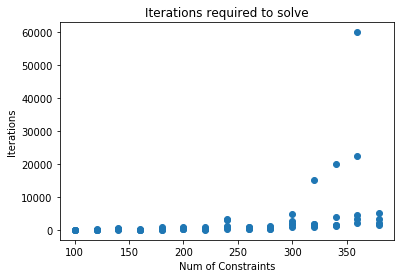


160 constraints
mean 101.4 med 252 max 252

320 constraints
mean 4247.2 med 1806 max 15148

100 constraints
mean 36.0 med 35 max 48

360 constraints
mean 18522.8 med 2180 max 60000

200 constraints
mean 493.8 med 206 max 826

140 constraints
mean 306.2 med 109 max 633

300 constraints
mean 2461.4 med 933 max 4878

340 constraints
mean 5664.2 med 20054 max 20054

240 constraints
mean 1744.0 med 3008 max 3370

280 constraints
mean 708.2 med 681 max 1230

180 constraints
mean 293.2 med 144 max 857

120 constraints
mean 101.2 med 43 max 281

260 constraints
mean 542.4 med 229 max 941

220 constraints
mean 376.4 med 59 max 830

380 constraints
mean 3060.0 med 3216 max 5086


In [7]:
# PLOTTING
xs, ys = [], []

for k, v in data.items():
    for result in v:
        xs.append(k)
        ys.append(result[3])
plt.title("Iterations required to solve")
plt.xlabel("Num of Constraints")
plt.ylabel("Iterations")
plt.scatter(xs, ys)
plt.show()

for k, v in data.items():
    print()
    print(k, "constraints")
    iters_all = [result[3] for result in v]
    print("mean", sum(iters_all)/len(iters_all), "med", iters_all[len(iters_all)//2], "max", max(iters_all))
    


In [11]:
import json

with open('data-Andrew-50.txt', 'w') as outfile:
    json.dump(data, outfile)

In [17]:
print([result[3] for result in data[360]])
print(data[360][1])

with open('failure-Andrew-50-0.txt', 'w') as outfile:
    json.dump(data[360][1], outfile)

[22442, 60000, 2180, 4685, 3307]
([29, 41, 30, 47, 36, 45, 26, 17, 19, 13, 21, 3, 8, 33, 39, 42, 10, 48, 9, 28, 5, 24, 43, 12, 25, 27, 34, 38, 35, 11, 20, 44, 32, 7, 40, 18, 2, 0, 6, 37, 22, 46, 31, 1, 16, 49, 23, 14, 4, 15], [(26, 21, 2), (3, 14, 47), (30, 21, 29), (20, 14, 24), (33, 5, 19), (13, 2, 47), (11, 7, 42), (30, 9, 12), (45, 12, 6), (47, 8, 40), (19, 3, 34), (29, 10, 23), (21, 37, 30), (41, 5, 14), (39, 16, 3), (42, 35, 49), (30, 27, 46), (9, 24, 2), (29, 13, 11), (16, 15, 2), (41, 26, 48), (31, 1, 3), (19, 0, 26), (25, 38, 9), (17, 34, 6), (20, 4, 28), (8, 1, 16), (41, 3, 25), (10, 23, 29), (5, 16, 14), (41, 35, 49), (19, 38, 44), (17, 24, 29), (38, 2, 15), (11, 46, 10), (29, 46, 4), (42, 4, 45), (26, 19, 15), (48, 28, 12), (3, 20, 26), (34, 2, 17), (30, 24, 27), (45, 42, 24), (10, 0, 46), (26, 10, 15), (44, 40, 17), (28, 20, 41), (0, 1, 40), (21, 42, 45), (5, 38, 10), (45, 6, 15), (41, 28, 14), (42, 5, 17), (35, 31, 42), (17, 44, 0), (40, 4, 12), (13, 33, 35), (29, 11, 46)

In [ ]:
with open('failure-Andrew-50-0.txt', 'r+') as infile:
    json.rea